In [3]:
import numpy as bp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df=pd.read_csv("C:\\Users\\parth\\OneDrive\\Desktop\\parth\\Machine-learning\\Machine-learning\\DATA\\gene_expression.csv")

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

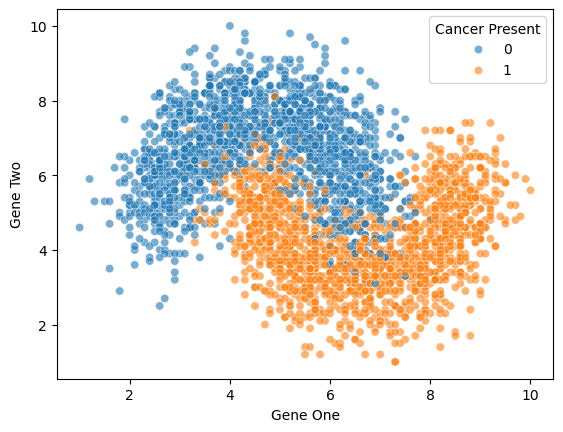

In [6]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.6)

In [7]:
len(df)

3000

(4.0, 8.0)

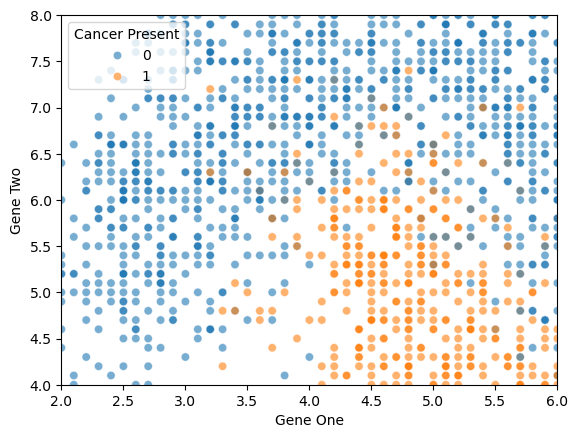

In [8]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.6)
plt.xlim(2,6)
plt.ylim(4,8)  # let see by zooming

(4.0, 8.0)

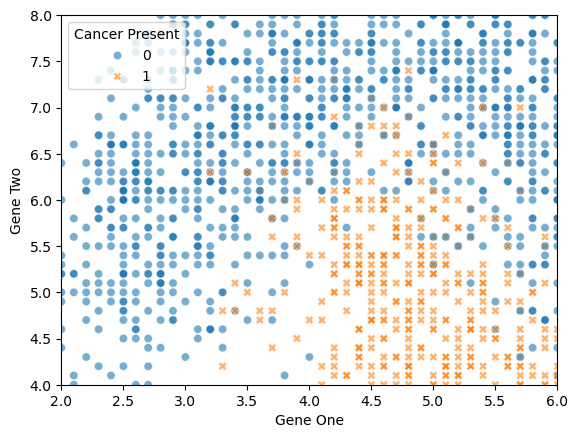

In [9]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',
                alpha=0.6,style='Cancer Present')  # let see by clearing stack points

plt.xlim(2,6)
plt.ylim(4,8)  # let see by zooming

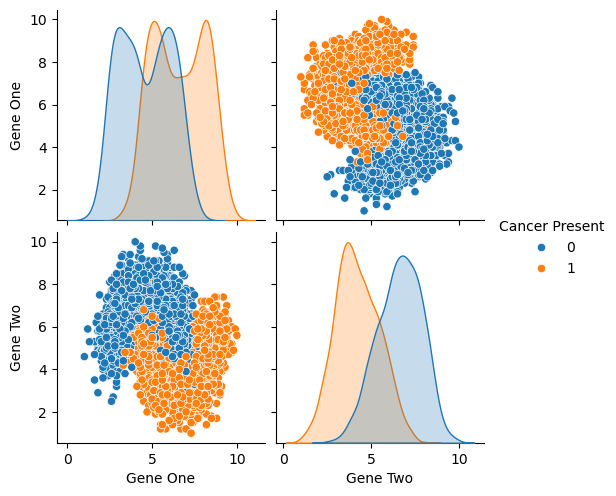

In [10]:
sns.pairplot(data=df,hue='Cancer Present')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
X=df.drop('Cancer Present',axis=1)

In [14]:
y=df['Cancer Present']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
scaler=StandardScaler()

In [17]:
scaled_X_train=scaler.fit_transform(X_train)

In [18]:
scaled_X_test=scaler.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [21]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred=knn_model.predict(scaled_X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
confusion_matrix(y_test,y_pred)

array([[382,  41],
       [ 34, 443]], dtype=int64)

In [25]:
len(y_test)

900

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.93      0.92       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



In [27]:
from sklearn.metrics import accuracy_score

# Choosing K

In [28]:
1-accuracy_score(y_test,y_pred) # this much is the error left 

0.08333333333333337

In [29]:
test_error_rates=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred=knn_model.predict(scaled_X_test)

    test_error_=1-accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error_)


In [30]:
test_error_rates

[0.08333333333333337,
 0.0922222222222222,
 0.07111111111111112,
 0.06555555555555559,
 0.06444444444444442,
 0.05888888888888888,
 0.06555555555555559,
 0.06333333333333335,
 0.06555555555555559,
 0.06333333333333335,
 0.06888888888888889,
 0.06333333333333335,
 0.06444444444444442,
 0.06222222222222218,
 0.06777777777777783,
 0.061111111111111116,
 0.06000000000000005,
 0.061111111111111116,
 0.06333333333333335,
 0.06222222222222218,
 0.06222222222222218,
 0.06444444444444442,
 0.061111111111111116,
 0.06000000000000005,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.061111111111111116,
 0.06222222222222218]

Text(0.5, 0, 'K Neighbors')

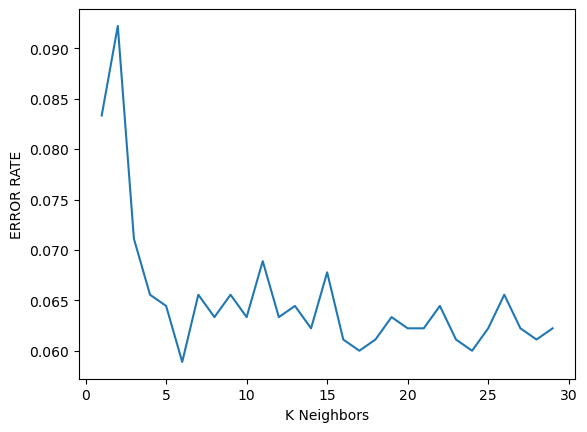

In [31]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

# PIPELINE =GRIDSEARCH CV

In [32]:
scaler=StandardScaler()

In [33]:
knn=KNeighborsClassifier()

In [35]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [36]:
operations=[('scaler',scaler),('knn',knn)]

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
pipe=Pipeline(operations)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
k_values=list(range(1,20))

In [41]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [42]:
param_grid={'knn__n_neighbors':k_values} # formula model__paramter of the model

In [48]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [49]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [50]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [51]:
full_pred=full_cv_classifier.predict(X_test)

In [52]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       423
           1       0.93      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [56]:
new_patient=[[4.0,6.4]]

In [57]:
full_cv_classifier.predict(new_patient)

c:\Users\parth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [59]:
full_cv_classifier.predict_proba(new_patient)

c:\Users\parth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.73684211, 0.26315789]])